Spam detection means detecting spam messages or emails by understanding text content so that only important messages or emails are received.  

Algorithms => Count Vectorizer and Multinomial Naive Bayes 

In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

%matplotlib inline

In [4]:
# ISO encoding can handle emojis and other special characters
data = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')
data.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# dropping the redundant columns 
cols_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
data.drop(cols_to_drop, axis = 1, inplace = True)
data.columns = ['label', 'message']
data.head()  # cleaned data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
# Declaring Count Vectorizer 
cv = CountVectorizer(decode_error = 'ignore')
X = cv.fit_transform(data['message'])

X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size = 0.3, random_state = 101)

Count Vectorizer creates a bag of words. In Bag of words, all the words in the vocabulary go along columns and documents go along rows. Each row depicts 1 message.  

In [9]:
data['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
# creating multinomial Naive Bayes model for Spam detection 
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
print('Training Accuracy: ', mnb.score(X_train, y_train) * 100)
print('Testing Accuracy: ', mnb.score(X_test, y_test) * 100)

Training Accuracy:  99.41025641025641
Testing Accuracy:  98.56459330143541


Naive Bayes works best on text data because of its naive assumption that features are independent of each other. 

Now, we write a function to create a word cloud for all the words in spam and ham categories. Bigger words have higher frequency of occurence and vice-versa. 

In [14]:
def visualize(label):
    words = ''
    for text in data[data['label'] == label]['message']:
        text = text.lower()
        words += text + ' '
    wordcloud = WordCloud(width = 600, height = 400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

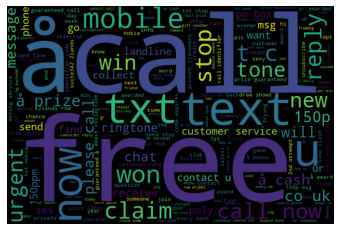

In [15]:
visualize('spam')

Observation => call and free are the biggest words, and both occur frequently in spam messages. 

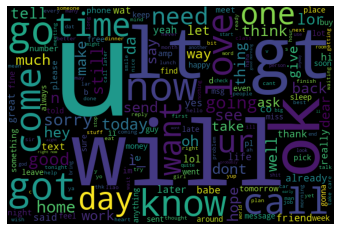

In [16]:
visualize('ham')

In [23]:
# Live Spam Detection
message = 'You are the lucky winner for the lottery price of $6million.'
message = cv.transform([message])
Class = mnb.predict(message)
print(Class[0])

spam
